# Correlation Between Elon Musk Tweeting about Crypto and Influencing Crypto Stock?
# 🐶🚀🌖

## By Ayomide Omogoke 05/17/2021

## Introduction

In my tutorial, I wanted to keep it a bit trendy and cover some of the recent trends that have made headlines this year. One of these headlines is the popular cryptocurrency called Dogecoin. Dogecoin started as a meme coin but has recently taken off as a popular and upcoming new cryptocurrency. A most notable figure that seems to be tied with Dogecoin and cryptocurrency's, in general, popularity is Tesla's CEO Elon Musk. Another Crypto Elon is involved with and, his company Tesla is BitCoin. It seems that whenever Elon Musk tweeted about Dogecoin or BitCoin, there would be buzz growing around them and, their stock price would also go up. I am here to analyze if there really is a correlation between Elon tweeting about the crypto and influencing their stock and just how much of an influence is there.

Let's start some data collection.

### Libraries used

In [25]:

import pandas # used to read my datasets gathered
import numpy as np # used for extra numerical processing needed
import matplotlib.pyplot as plt # used for Data visualization and plotting
from datetime import datetime,timezone # used for time conversion needed to use eaarlier
from sklearn import linear_model # used for linear regression analysis for statistics and machine learning section

## Data Collection
I was able to collect public datasets for my analysis from Kaggle.com, an online community with Open Dataset and Machine Learning Projects. On the site, I found 3 data sets. One was a dataset about all tweets Elon Musk has tweeted from 2010 to 2021. This dataset will help me scrape for any mentions Elon made about dogecoin or Bitcoin. Another dataset about DogeCoin's historical stock price dating all the way back to September 17, 2014. The last dataset is about BitCoin minute to minute historical stock price dating all the way back to its first release in 2009.

I will start by extracting each dataset, Elon Musk Tweets, DogeCoin, and BitCoin.

In [26]:
elon_tweets= pandas.read_csv('TweetsElonMusk.csv')
doge_stock = pandas.read_csv('DOGE-USD.csv')
bitcoin_stock =pandas.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [27]:
print("Total Rows:", len(elon_tweets))
elon_tweets.head()

Total Rows: 12562


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN


In [28]:
print("Total Rows:", len(doge_stock))
doge_stock.head()

Total Rows: 2424


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [29]:
print("Total rows:",len(bitcoin_stock))
bitcoin_stock.head()

Total rows: 4857377


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding the Data.

Above, I have shown each dataset's top 5 columns and how many rows are in each. The dataset contains a lot of other columns though I won't be needing those. It also contains a lot of missing data representation: NaN. what do those mean? In Elon Musk Dataset, those deal with twitter settings that the profile hasn't turned on or dataset wasn't able to gather such as the location the tweet was tweeted. This doesn't affect our purpose of the dataset as all we need in that dataset are the date and tweet itself Elon made, which are all there. In the Bitcoin dataset, the Nan represents stock market fluctuation such as if the exchange was down, technical errors, or exchange didn't exist. This would be a problem but, because the rows provided minute to minute detailing of Bitcoin price over the years, It is still accurate. Therefore it is safe to drop these NAN in bitCoin stock price and, they wouldn't affect our analysis.

In [30]:
# lot of nan want to drop those
bitcoin_stock = bitcoin_stock.dropna()
print("Total rows after dropping NAN's:",len(bitcoin_stock))
bitcoin_stock.head()

Total rows after dropping NAN's: 3613769


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


## Data Management/Analysis
Now that I have my datasets, I want to find out when does elon musk Tweet's mention Doge or BTC, and collect what he said about it.

In [31]:
tweets = elon_tweets['tweet'].tolist()
dogeTweets = {}
btcTweets = {}
dogeMentions=0
btcMentions = 0

for i in range(0,len(tweets)):
    date =elon_tweets.iloc[i]['date']
    check = tweets[i].lower()
#     check for any tweets of doge or btc
    if 'doge' in check or 'dogecoin' in check:
        dogeMentions+=1
    #  the assumption what if he tweeted about doge more than once in a day 
        if date in dogeTweets:
            dogeTweets[date].append(tweets[i])
        else:
            dogeTweets[date]=[tweets[i]]

    if 'btc' in check or 'bitcoin' in check:
        btcMentions+=1
        # the assumption what if he tweeted about btc more than once in a day 
        if date in btcTweets:
            btcTweets[date].append(tweets[i])
        else:
            btcTweets[date]=[tweets[i]]

btcTweets


{'2021-03-24': ['Pay by Bitcoin capability available outside US later this year',
  'Tesla is using only internal &amp; open source software &amp; operates Bitcoin nodes directly.  Bitcoin paid to Tesla will be retained as Bitcoin, not converted to fiat currency.',
  'You can now buy a Tesla with Bitcoin'],
 '2021-03-12': ['BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!'],
 '2021-02-20': ['@PeterSchiff That said, BTC &amp; ETH do seem high lol'],
 '2021-02-19': ['@business To be clear, I am *not* an investor, I am an engineer. I don’t even own any publicly traded stock besides Tesla.   However, when fiat currency has negative real interest, only a fool wouldn’t look elsewhere.   Bitcoin is almost as bs as fiat money. The key word is “almost”.',
  '@business Tesla’s action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&amp;P500 company.'],
 '2021-02-08': ['

In [32]:
dogeTweets

{'2021-04-08': ['@dogeofficialceo @WatchersTank @SpaceX Looking at pups soon!'],
 '2021-04-01': ['SpaceX is going to put a literal Dogecoin on the literal moon'],
 '2021-03-25': ['@dogecoinww @MattWallace888 @CorinnaKopf You raise a good point haha'],
 '2021-03-18': ['@lexfridman Sometimes it’s about Doge'],
 '2021-03-16': ['@beeple 420M Doge'],
 '2021-03-14': ['Why are you so dogematic, they ask',
  'Origin of Doge Day Afternoon: The ancient Romans sacrificed a Dogecoin at the beginning of the Doge Days to appease the rage of Sirius, believing that the star was the cause of the hot, sultry weather.',
  'Doge day afternoon'],
 '2021-03-06': ['Doge spelled backwards is Egod'],
 '2021-03-02': ['@WootiezTV Very much so &amp; its leader shall be The Doge   https://t.co/VXmuW5c0y9',
  '@draecomino 2022: Dogecoin is dumb'],
 '2021-03-01': ['Doge meme shield (legendary item)  https://t.co/CeomU9q84c'],
 '2021-02-21': ['Dojo 4 Doge'],
 '2021-02-20': ['@PPathole @dogecoin Just some used Antmine

In [33]:
dogeDates = dogeTweets.keys()
btcDates = btcTweets.keys()

print("Elon mentioned Doge in his tweets ", dogeMentions," times")
print("Elon mentioned Bitcoin in his tweets ", btcMentions," times")
print("Elon Tweeted about doge a total of ", len(dogeDates), " days and a total of ", len(btcDates), " days")


Elon mentioned Doge in his tweets  41  times
Elon mentioned Bitcoin in his tweets  24  times
Elon Tweeted about doge a total of  26  days and a total of  16  days


### Evaluation on Data manegment/Analysis results
It's kinda shocking. I would think Elon would tweet more about BTC than dogecoin since Bitcoin has been around longer. We can clearly see which crypto might be his favorite or at least his favorite to tweet about.
## Data matching
Now I've collected and can see when Elon tweeted about Doge or BTC. How did the crypto stock react the days he tweeted? To do this, I now need to find information on the Doge and BitCoin currency on those days.
### Doge stock's stats when Elon Tweeted 

In [34]:
dogeData = doge_stock.loc[doge_stock['Date'].isin(dogeDates)]
dogeData

,Date,Open,High,Low,Close,Adj Close,Volume
1658,2019-04-02,0.002459,0.002863,0.002394,0.002795,0.002795,6.029836e+07
2047,2020-04-25,0.002102,0.002146,0.002087,0.002142,0.002142,2.298104e+08
2131,2020-07-18,0.003060,0.003629,0.003031,0.003473,0.003473,2.040809e+08
2253,2020-11-17,0.002908,0.002976,0.002886,0.002936,0.002936,4.663146e+07
2286,2020-12-20,0.003926,0.004678,0.003827,0.004625,0.004625,5.080660e+08
2332,2021-02-04,0.037226,0.057869,0.035945,0.053289,0.053289,1.304084e+10
2334,2021-02-06,0.046931,0.058308,0.044904,0.057595,0.057595,5.946101e+09
2335,2021-02-07,0.057502,0.084357,0.054239,0.078782,0.078782,1.426102e+10
2336,2021-02-08,0.078352,0.084945,0.064702,0.078825,0.078825,1.284438e+10
2338,2021-02-10,0.070111,0.081091,0.068525,0.072896,0.072896,6.785088e+09


 ### Evaluation of Doge Data Matching
 
Okay, these dates are looking promising. It looks like when Elon tweeted about Doge, It had a high jump those days. Though, let's make this inference more visual to see. To show this moving on to Exploratory Data analysis of the result.


## DogeCoin's Exploratory Data Analysis
Moving on, I want to make a plot showing how high the doge went up from closing. To do so, I will be making a plot showing percentage increase over time between open and high.

<ipython-input-35-ac32a7361d9c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogeData['PercentIncrease']=store


,Date,Open,High,Low,Close,Adj Close,Volume,PercentIncrease
1658,2019-04-02,0.002459,0.002863,0.002394,0.002795,0.002795,6.029836e+07,16.429443
2047,2020-04-25,0.002102,0.002146,0.002087,0.002142,0.002142,2.298104e+08,2.093245
2131,2020-07-18,0.003060,0.003629,0.003031,0.003473,0.003473,2.040809e+08,18.594771
2253,2020-11-17,0.002908,0.002976,0.002886,0.002936,0.002936,4.663146e+07,2.338377
2286,2020-12-20,0.003926,0.004678,0.003827,0.004625,0.004625,5.080660e+08,19.154356
2332,2021-02-04,0.037226,0.057869,0.035945,0.053289,0.053289,1.304084e+10,55.453178
2334,2021-02-06,0.046931,0.058308,0.044904,0.057595,0.057595,5.946101e+09,24.241972
2335,2021-02-07,0.057502,0.084357,0.054239,0.078782,0.078782,1.426102e+10,46.702723
2336,2021-02-08,0.078352,0.084945,0.064702,0.078825,0.078825,1.284438e+10,8.414591
2338,2021-02-10,0.070111,0.081091,0.068525,0.072896,0.072896,6.785088e+09,15.660881


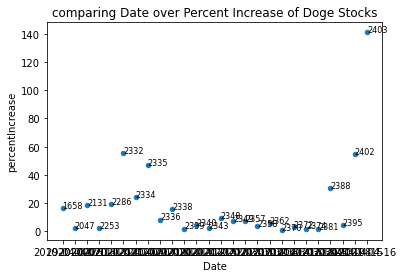

In [35]:
# percentage increase formula = 100*(final-inital)/(initial)

timeVpercent =[]
store=[]
for idx, r in dogeData.iterrows():
    fin= r['High']
    initial=r['Open']
    pInc = ((fin-initial)/initial)*100
    store.append(pInc)
    
    timeVpercent.append((r['Date'],pInc))
    
timeVPerc= pandas.DataFrame(timeVpercent,columns=['Date','percentIncrease'])
# add new column
dogeData['PercentIncrease']=store
timeVPerc.plot.scatter(x='Date',y='percentIncrease',title="comparing Date over Percent Increase of Doge Stocks")

for t in range(0,timeVPerc.shape[0]):
    plt.text(timeVPerc.Date[t],timeVPerc.percentIncrease[t],dogeData.index[t],fontsize=8)
dogeData

## Bitcoin Data Matching 

To find matching Bitcoin is a bit more complicated. The Timestamp in the BTC Datasets aren't Calendar dates but Unix times. They are asl 60s times apart between each row. So a day of BTC crypto stats are made up of 1440 rows.

Luckily DateTime library will help us here. Instead of converting all of the times of million rows of data,
will start at the earliest date Elon mentioned bitcoin. I will first need to convert the Unix times into Calendar dates. Strategy next is to get the highest and low between the date he tweeted and the last second of the day(so at MM-DD-YYYY: 23:59). Then get the first(open), max(high), min(low), last(close) out of the rows between those dates. Intuition for getting the closing date is it will be the last in my chronological list of BTC stats. I also repeat these steps in the code as I am doing it.

In [36]:
bitcoin_stock.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [37]:
# instead of converting all of times of million rows of data
# will start at earliest date elon mentioned bitcoin
bitDate=list(btcDates)
firstDate=bitDate[-1]
print("this was first date elon mentioned Bitcoin ",firstDate," and last date ", bitDate[0])
parse=firstDate.split('-')

chkpt= datetime(int(parse[0]),int(parse[1]),int(parse[2]))
timestp=chkpt.replace(tzinfo=timezone.utc).timestamp()

# 1325317920, earliest date Elon tweeted about BTC in UNIX

# 1511827200.0 ,this is the frist timestamp in btc 
# 2017-11-28 , earliest date Elon tweeted about BTC


bitcoin_stock=bitcoin_stock.loc[bitcoin_stock['Timestamp']>=timestp]

print("new size of bitcoin stock: ",len(bitcoin_stock))


btcTimes = bitcoin_stock["Timestamp"].tolist()
#  strategy is to get the highest and low between the date he tweeted
# and the next day in utc

btcStats = {}



for date in bitDate:
#     converting date to unix
    parse = date.split('-')
    start=datetime(int(parse[0]),int(parse[1]),int(parse[2]))
    startstp=start.replace(tzinfo=timezone.utc).timestamp()
    
#   getting last second of the date in unix
    end=datetime(int(parse[0]),int(parse[1]),int(parse[2]),int(23),int(59))
    endstp=end.replace(tzinfo=timezone.utc).timestamp()
    
#     getting all btcStats rows that are in between first time and last time of the date
    stockRange= bitcoin_stock[(bitcoin_stock['Timestamp']>=startstp) & (bitcoin_stock['Timestamp']<=endstp)]
    firstE = stockRange['Timestamp'].tolist()[0]
    convert= datetime.utcfromtimestamp(firstE).strftime('%Y-%m-%d') 
    #converting the unix time in btc to calendar date to ensure I converted right and dates match
    if date != convert:
        print("date i am working on doesnt matches: ", convert, " ", date)

# getting the first(open), max(high), min(low), last(close)     
    fOpen = stockRange['Open'].tolist()[0]
    maxHigh = max(stockRange['High'].tolist())
    minLow = min(stockRange['Low'].tolist())
    endClose = stockRange['Close'].tolist()[-1]
#     intuition for getting closing date is it will be the last in list

#     storing results in dict
    btcStats[date]=[["Open",fOpen],["High",maxHigh],["Low",minLow],["Close",endClose]]
    
btcStats

this was first date elon mentioned Bitcoin  2017-11-28  and last date  2021-03-24
new size of bitcoin stock:  1709875


{'2021-03-24': [['Open', 54360.07],
  ['High', 57207.33],
  ['Low', 51638.76],
  ['Close', 52287.52]],
 '2021-03-12': [['Open', 57847.92],
  ['High', 58098.5],
  ['Low', 55011.0],
  ['Close', 57271.04]],
 '2021-02-20': [['Open', 56000.59],
  ['High', 57553.81],
  ['Low', 54000.0],
  ['Close', 55936.04]],
 '2021-02-19': [['Open', 51560.46],
  ['High', 56399.99],
  ['Low', 50627.32],
  ['Close', 55988.58]],
 '2021-02-08': [['Open', 38870.36],
  ['High', 46712.12],
  ['Low', 38050.97],
  ['Close', 46416.45]],
 '2021-01-29': [['Open', 33488.66],
  ['High', 38620.0],
  ['Low', 31990.0],
  ['Close', 34249.64]],
 '2020-12-20': [['Open', 23842.38],
  ['High', 24298.04],
  ['Low', 23092.77],
  ['Close', 23470.85]],
 '2020-11-17': [['Open', 16727.85],
  ['High', 17868.0],
  ['Low', 16570.0],
  ['Close', 17680.63]],
 '2020-07-19': [['Open', 9175.7],
  ['High', 9243.36],
  ['Low', 9106.3],
  ['Close', 9211.99]],
 '2020-05-16': [['Open', 9307.43],
  ['High', 9590.0],
  ['Low', 9216.08],
  ['Close',

## Bitcoin Exploratory Data Analysis
For Exploratory Data Analysis in Bitcoin, want to make a plot showing how high the btc went up from closing.
I will plot the time over percentage increase between open and high

{'2021-03-24': [['Open', 54360.07],
  ['High', 57207.33],
  ['Low', 51638.76],
  ['Close', 52287.52],
  ['PercentInc', 5.237778391381767]],
 '2021-03-12': [['Open', 57847.92],
  ['High', 58098.5],
  ['Low', 55011.0],
  ['Close', 57271.04],
  ['PercentInc', 0.43317028512002115]],
 '2021-02-20': [['Open', 56000.59],
  ['High', 57553.81],
  ['Low', 54000.0],
  ['Close', 55936.04],
  ['PercentInc', 2.773577921232618]],
 '2021-02-19': [['Open', 51560.46],
  ['High', 56399.99],
  ['Low', 50627.32],
  ['Close', 55988.58],
  ['PercentInc', 9.38612650081089]],
 '2021-02-08': [['Open', 38870.36],
  ['High', 46712.12],
  ['Low', 38050.97],
  ['Close', 46416.45],
  ['PercentInc', 20.17413782635407]],
 '2021-01-29': [['Open', 33488.66],
  ['High', 38620.0],
  ['Low', 31990.0],
  ['Close', 34249.64],
  ['PercentInc', 15.32261965692266]],
 '2020-12-20': [['Open', 23842.38],
  ['High', 24298.04],
  ['Low', 23092.77],
  ['Close', 23470.85],
  ['PercentInc', 1.911134710544836]],
 '2020-11-17': [['Open',

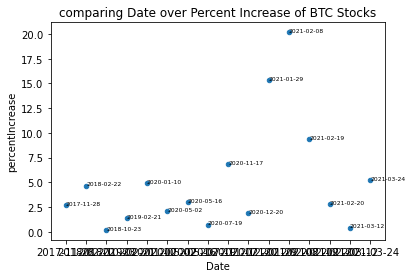

In [38]:
# percentage increase formula = 100*(final-inital)/(initial)


# have to trav list backwards to go from earliest to highest
timeVpInc=[]
for i in reversed(bitDate):
    fin = btcStats[i][1][-1] #getting the high in dict found in last val in 2nd array
    initial = btcStats[i][0][-1] #getting the open in dict found in first val in 1st array
    pInc = ((fin-initial)/initial)*100
#     add percent Inc to dict
    if(len(btcStats[i])<=4):
#         just to make sure im not adding duplicates when rerunning method 
        btcStats[i].append(['PercentInc',pInc])
    timeVpInc.append((i,pInc))
        
dateVPerc=pandas.DataFrame(timeVpInc,columns=['Date','percentIncrease'])
dateVPerc.plot.scatter(x='Date',y='percentIncrease',title="comparing Date over Percent Increase of BTC Stocks")
for t in range(0,dateVPerc.shape[0]):
    plt.text(dateVPerc.Date[t],dateVPerc.percentIncrease[t],dateVPerc.Date[t],fontsize=6)
btcStats
    

## Comparing Doge Percentage Increase and BTC Percentage Increase When Elon Tweeted about them

<AxesSubplot:title={'center':'comparing Date over Percent Increase of Doge Stocks'}, xlabel='Date', ylabel='percentIncrease'>

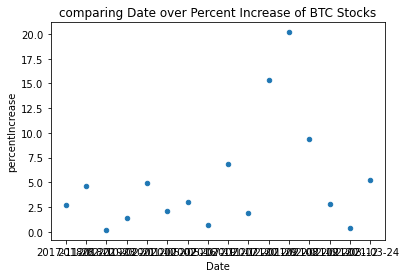

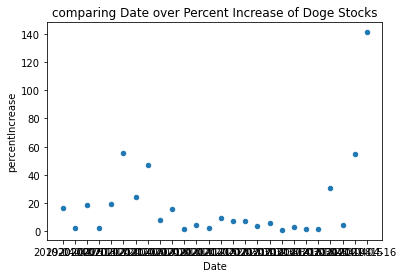

In [39]:
# replotting to have them side by side
dateVPerc.plot.scatter(x='Date',y='percentIncrease',title="comparing Date over Percent Increase of BTC Stocks")
timeVPerc.plot.scatter(x='Date',y='percentIncrease',title="comparing Date over Percent Increase of Doge Stocks")

## Interpreting BTC and Dogecoin Data Visual Analysis
Wow. When comparing the 2, there seems to be bigger percentage increase jumps in Doge than in BTC at times Elon tweets about corresponding crypto. Perhaps It's because Doge is still newer, under a Dollar (at moment this analysis was made) which would make it easier for it to rise compared to Bitcoin which is already valued at over $40K *at the time this study was made)

## Summary Statistics of Findings

In [40]:
# show total percentage Elon influence has done in both
# show max percentage done in both and corresponding tweet Elon tweeted
# show minimum done in both and corresponding tweet Elon tweeted
# show mean and median 

dogeTotal= dogeData['PercentIncrease'].sum()
dogeAvg = dogeData['PercentIncrease'].mean()
dogeHighest = dogeData['PercentIncrease'].max()
hDate = dogeData[dogeData['PercentIncrease']==dogeHighest]['Date'].tolist()
dogeTweet = dogeTweets[hDate[0]]

dogeLowest = dogeData['PercentIncrease'].min()
lDate = dogeData[dogeData['PercentIncrease']==dogeLowest]['Date'].tolist()
lowTweet = dogeTweets[lDate[0]]

print("---Summary Statistic of DogeCoin When Elon Tweeted about It----")
print("Total Percentage Increase:","{0:.2f}%.".format(dogeTotal),"Average percentage Increase:{0:.2f}%".format(dogeAvg))
print("Highest Percentage increase: {0:.2f}%,".format(dogeHighest),"on:",hDate[0],"Which Elon Tweeted:", dogeTweet)
print("\nLowest Percentage Increase: {0:.2f}%,".format(dogeLowest),"on:", lDate[0],"Which Elon Tweeted:",lowTweet)

# print(dogeTotal,dogeAvg,dogeHighest,hDate[0],dogeTweet,dogeLowest,lDate[0],lowTweet)


btcPercents = []
mDate = "empty"
minDate = "empty"
btcHigh = -1
btcLow = 1000

for v,x in btcStats.items():
#     adding all percentage increase to one thing
    val = x[-1][-1]
    if val>btcHigh:
        btcHigh=val
        mDate=v
    if val < btcLow:
        btcLow = val
        minDate=v
    btcPercents.append(val)
    

btcTotal = sum(btcPercents)
btcAvg = btcTotal/len(btcPercents)
btcHTweet=btcTweets[mDate]
btcLTweet = btcTweets[minDate] 

print("\n---Summary Statistic of BitCoin When Elon Tweeted about It----")
print("Total Percentage Increase:","{0:.2f}%.".format(btcTotal),"Average percentage Increase: {0:.2f}%".format(btcAvg))
print("Highest Percentage increase: {0:.2f}%,".format(btcHigh),"on:",mDate,"Which Elon Tweeted:", btcHTweet)
print("\nLowest Percentage Increase: {0:.2f}%,".format(btcLow),"on:", minDate,"Which Elon Tweeted:",btcLTweet)

# print(btcTotal,btcAvg,btcHigh,mDate,btcHTweet,btcLow,minDate,btcLTweet)
# ironic that the Tweet that Elon made btc rise the highest he was talking bad about Doge

# dogeData

---Summary Statistic of DogeCoin When Elon Tweeted about It----
Total Percentage Increase: 489.19%. Average percentage Increase:18.82%
Highest Percentage increase: 141.04%, on: 2021-04-16 Which Elon Tweeted: ['@sadiaslayy @DogecoinBets 😮']

Lowest Percentage Increase: 1.07%, on: 2021-03-14 Which Elon Tweeted: ['Why are you so dogematic, they ask', 'Origin of Doge Day Afternoon: The ancient Romans sacrificed a Dogecoin at the beginning of the Doge Days to appease the rage of Sirius, believing that the star was the cause of the hot, sultry weather.', 'Doge day afternoon']

---Summary Statistic of BitCoin When Elon Tweeted about It----
Total Percentage Increase: 81.78%. Average percentage Increase: 5.11%
Highest Percentage increase: 20.17%, on: 2021-02-08 Which Elon Tweeted: ['@itsALLrisky Doge appears to be inflationary, but is not meaningfully so (fixed # of coins per unit time), whereas BTC is arguably deflationary to a fault.  Transaction speed of Doge should ideally be a few orders o

### Interpreting Summary Results
It's Ironic that the Tweet that Elon made BTC rise the highest he was talking bad about Doge. Meanwhile, the highest Jump Doge Ever made, Elon only tweeted an emoji (though it's worth mentioning, he tweeted about Doge the day before as well).

"Oh big whoop, these might just be coincidences", Someone might say. Here's where I may differ from that opinion. Because Dogecoin had a higher percentage increase, and Elon tweeted about it more than BTC, I will focus on that for the next analysis. 

Let's see Dogecoin's trend in the previous days leading up to Elon tweeting. It's safe to say these days would not be affected by Elon since he didn't tweet about it and it would just be the Doge's normal behavior(or outside variables affecting it not relevant to our study) on the market. 

I will also use machine learning insights in this. I will use linear regression and prediction capabilities to map out what the next day percent increase should be based on collecting data from previous days. This will allow us to compare the expected result and the actual result of the day Elon Tweeted about Doge.

## Hypothesis Testing and Machine Learning 
To see if it accurately predicts, will select 5 Elon tweet dates. Then calculate the last 6 days' percentage increase. I am choosing the last 6 days so it will be a week's worth of Doge's currency data to be sufficient enough for algorithm prediction. I will plot them using linear regression to see if when Elon tweeted was an outlier. I will do this by plotting where it's expected to be and when it actually was by using a different color to plot it.

I will also be comparing last 6 days average, with the actual value. 

Green plot is the Percent Increase of when elon tweeted
Comparing Percent increase average of last 6 days: 4.918013642759946 to elon tweet 16.42944286295243 on  2019-04-02
Comparing Percent increase average of last 6 days: 1.8878816318294203 to elon tweet 18.59477124183007 on  2020-07-18
Comparing Percent increase average of last 6 days: 31.08280386742491 to elon tweet 55.453177886423454 on  2021-02-04
Comparing Percent increase average of last 6 days: 2.3197886918472306 to elon tweet 30.670021433230836 on  2021-04-01
Comparing Percent increase average of last 6 days: 20.064551863913092 to elon tweet 54.60150040852707 on  2021-04-15


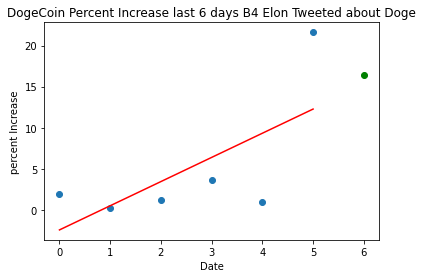

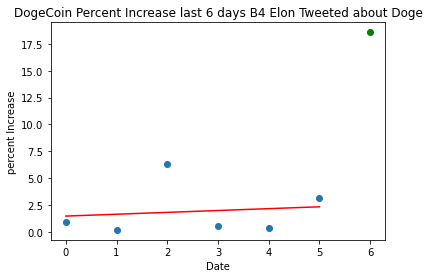

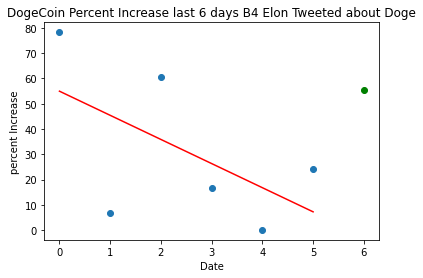

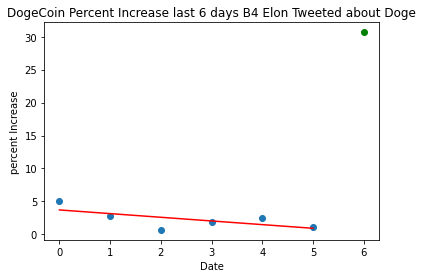

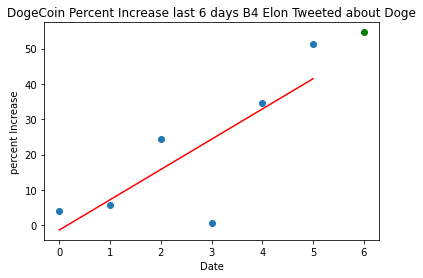

In [44]:

# dogeData contains days when elon tweeted
# doge_stock is just everything


    
# get random dates index
# at first i wanted to do it randot
# but that was really hard to do, not enough days fit those criteria
# there wasn't a lot of dates when he doesnt tweet about doge again.
# so i went back chose days with significant 
# percent increase and spaced out he didnt tweet again

ranDatesIdx=[1658,2131,2332,2388,2402]

print("Green plot is the Percent Increase of when elon tweeted")
# from ranDates going to select last 7 dates 
param = 6
for day in ranDatesIdx:
    lastWeek = []
    i=6
    timeVper=[]
    store=[]
    while len(lastWeek)<param:
        cDay=day-i
        curr=doge_stock.loc[cDay]
        fin=curr['High']
        initial=curr['Open']
        pInc = ((fin-initial)/initial)*100
        store.append(pInc)
#         timeVper.append(curr['Date'])
        
        timeVper.append((curr['Date'],pInc))
        
        lastWeek.append(curr)
        i-=1
        
    timeVPER = pandas.DataFrame(timeVper,columns=['Date','percentIncrease'])
    lm=linear_model.LinearRegression()
    lm.fit(np.asarray(timeVPER.index).reshape(-1,1),timeVPER['percentIncrease'].tolist())

    perc=dogeData.loc[day]['PercentIncrease']
    thtDay = dogeData.loc[day]['Date']
    singlePt=pandas.DataFrame([(thtDay,perc)],columns=['Date','percentIncrease'])
#    average of last 6 days vs Elon tweeting average
    avg = timeVPER['percentIncrease'].mean()
    print("Comparing Percent increase average of last 6 days:", avg,"to elon tweet", perc, "on ", thtDay)
    
#     plot the data
    fig,ax = plt.subplots()
    ax.scatter(timeVPER.index,timeVPER['percentIncrease'])
    ax.set_xlabel("Date")
    ax.set_ylabel("percent Increase")
    ax.set_title("DogeCoin Percent Increase last 6 days B4 Elon Tweeted about Doge") #change this later
    ax.plot(np.asarray(timeVPER.index).reshape(-1,1),
            lm.predict(np.asarray(timeVPER.index).reshape(-1,1)),color='red')
    ax.scatter(6,singlePt['percentIncrease'],color='green')


## Communications of Insight Gathered
I have one thing left to say. DogeCoin to the Moon! 

Here's the rest of the one thing I have to say lol. On the Insights gathered, There does seem to be a bit of Correlation when Elon tweeting about Doge or BTC (more specifically Doge) and the crypto being affected by it. There is sufficient data to assume a positive correlation between the 2. Sometimes it even seems Elon tweet's about Doge didn't need to be praising Doge for the stock to go up. However, whenever Elon tweets negatively about the stock, it did seem to make it go down as mentioned earlier in an example. I will put a disclaimer that I am not saying whenever Elon tweets about Doge to automatically invest, use your discretion outside of assignment as this is just a school project. As I mentioned earlier, I am also surprised that bitcoin wasn't influenced more than the data show since I know Tesla did allow purchases with BitCoin. Overall, this was a fun project and I hope as you are reading this, you learned some cool things from my tutorial.